In [80]:
import pandas as pd 
#machine learning importation, allows for splitting the data set into traininng an dtesting sets.
from sklearn.model_selection import train_test_split
#machine learning importation, allows for standardization and normalizing methods in preprocessing, each column has a mean of 0 and a SD of 1 (scaling so that wider ranges dont dominate th elearning process)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#SVM packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

#Importation to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#importing xgboost model
import xgboost as xgb

#library for KNN
from sklearn.neighbors import KNeighborsClassifier

#library for Logical Regression
from sklearn.linear_model import LogisticRegression

#library for artificial neural network
#import tensorflow as tf 
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


In [81]:
# data for PD patients
data = pd.read_csv('parkinsons.data') 
posStatus = data[data['status'] == 1]
posStatus.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#statistcal analysis for PD patients' data
posStatus.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,...,0.032391,0.044447,4.339143,0.0,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,...,0.013640,0.002310,8.441000,1.0,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,...,0.027400,0.008445,18.782000,1.0,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,...,0.044510,0.016580,21.414000,1.0,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,...,0.068455,0.027960,24.164500,1.0,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,29.928000,1.0,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# data for healthy patients 
negStatus = data[data['status'] == 0]
negStatus.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [5]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
#statistcal analysis for healthy patients' data
negStatus.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.010368,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.022060,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.026330,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001908,0.002228,0.005725,0.020210,0.189250,...,0.034540,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.070080,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


In [82]:
data.shape
#195 tests/patients, 24 columns 

(195, 24)

In [83]:
data.drop(["name"], axis='columns').corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [84]:
selected_features = ['spread1', 'PPE', 'spread2', 'D2', 'RPDE', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'NHR', 'MDVP:Fo(Hz)']

# Create a new DataFrame with only the selected features and the target variable
df_selected = data[selected_features ]

# Display the refined dataset
print("Selected Features Dataset:")
df_selected

Selected Features Dataset:


,spread1,PPE,spread2,D2,RPDE,MDVP:Jitter(%),MDVP:Shimmer,MDVP:APQ,HNR,NHR,MDVP:Fo(Hz)
0,-4.813031,0.284654,0.266482,2.301442,0.414783,0.00784,0.04374,0.02971,21.033,0.02211,119.992
1,-4.075192,0.368674,0.335590,2.486855,0.458359,0.00968,0.06134,0.04368,19.085,0.01929,122.400
2,-4.443179,0.332634,0.311173,2.342259,0.429895,0.01050,0.05233,0.03590,20.651,0.01309,116.682
3,-4.117501,0.368975,0.334147,2.405554,0.434969,0.00997,0.05492,0.03772,20.644,0.01353,116.676
4,-3.747787,0.410335,0.234513,2.332180,0.417356,0.01284,0.06425,0.04465,19.649,0.01767,116.014
...,...,...,...,...,...,...,...,...,...,...,...
190,-6.538586,0.133050,0.121952,2.657476,0.448439,0.00459,0.04087,0.02745,19.517,0.02764,174.188
191,-6.195325,0.168895,0.129303,2.784312,0.431674,0.00564,0.02751,0.01879,19.147,0.01810,209.516
192,-6.787197,0.131728,0.158453,2.679772,0.407567,0.01360,0.02308,0.01667,17.883,0.10715,174.688
193,-6.744577,0.123306,0.207454,2.138608,0.451221,0.00740,0.02296,0.01588,19.020,0.07223,198.764


In [85]:
#setiing up features and target variables
Y = data['status']
# Y is the value that the model will be predicting

X = data.drop(["status", "name"], axis='columns')
# X uses the columns to train the model (the features), dropping 
# name and status so that the numerical values are ran only, 
# and so that the traning set doen;t have access to the Y

X.head(5)
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [86]:
#splitting the data between training and testing models

X_train, X_test, y_train,  y_test = train_test_split(X, Y ,  random_state=104, train_size=0.8, shuffle=True) 
# X train contains the groups of samples to train the model, X test contains the groups of samples to test the model, Y 
# train and Y test contains the labels of the labels of x tarin and test respectively

##try training 70% and 30% testing! Look for parameter that spilts the tarining and testing sets evenly.

In [87]:
# Data standarization process,fit_transform are fro the standard scaler library 

object = StandardScaler()
X_train_scale = object.fit_transform(X_train)  # Fits x_train on the training set by finding the mean and standard deviation of each column in the set
X_test_scale = object.fit_transform(X_test)  # Transform the test set (x_set) using training statistics



In [88]:
# Training non-linear algorithm for model using Radial Basis Function kernel, C initializes trade off for the margin, a higher margin would classify the data more accuratly
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)


In [89]:
#fitting the SVM to the Parkinson's model
nonlinear_clf.fit(X_train_scale, y_train)

SVC()

In [90]:
# Predicting on the test set
y_pred = nonlinear_clf.predict(X_test_scale)

In [91]:
#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.31%
Confusion Matrix:
[[ 6  3]
 [ 0 30]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        30

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39



In [92]:
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=["Actual Negative", "Actual Positive"], 
                              columns=["Predicted Negative", "Predicted Positive"])

print("Confusion Matrix:")
print(conf_matrix_df)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   6                   3
Actual Positive                   0                  30
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        30

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39



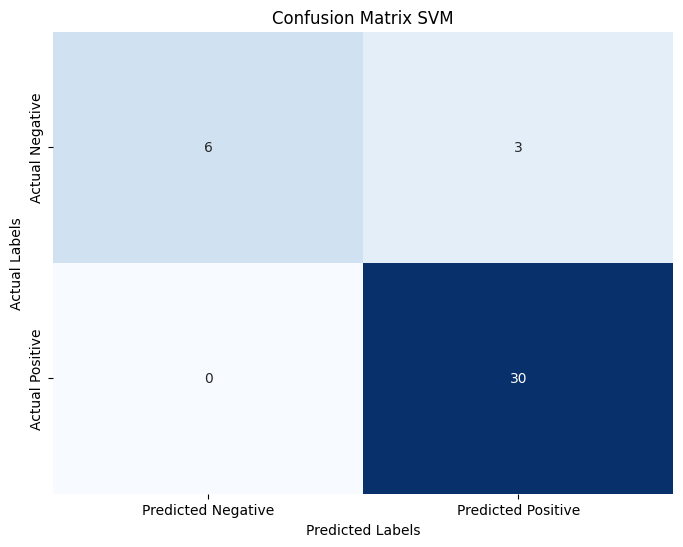

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        30

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39



In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

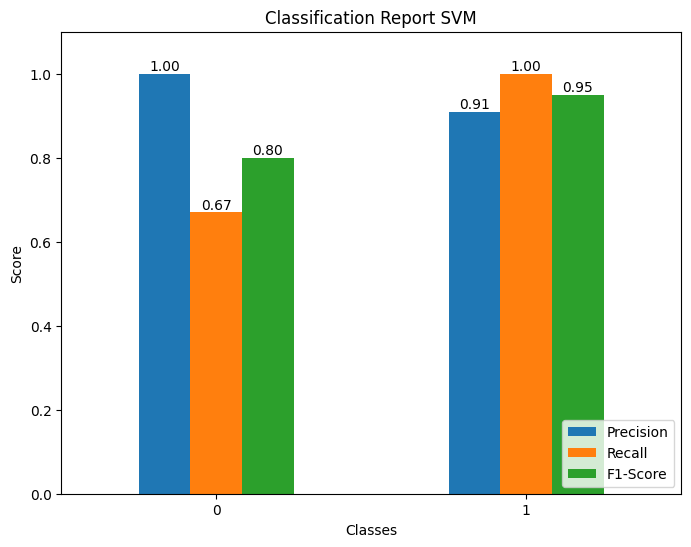

In [94]:
# Classification report data
report_data = {
    'Class': ['0', '1'],
    'Precision': [1.00, 0.91],
    'Recall': [0.67, 1.00],
    'F1-Score': [0.80, 0.95]
}

# Convert to DataFrame
report_df = pd.DataFrame(report_data)

# Plot the bar chart
report_df.set_index('Class').plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report SVM')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# Annotate bars with values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

plt.show()

In [18]:
# Confusion Matrix: the rows represent the actual classes(true labels) and the columns represent the predicted classes.
# Row 0: 6 true positives predicted, in class zero (predicted healthy patients correctly), 3 false positives (incorrectly predicted as class 0 when they were class 1)
# Row 1: No false positives predicted, 30 cases of true negatives (correctly predicted as class 1)


In [95]:
#xgboost model
model_xgb = xgb.XGBClassifier(objective='binary:logistic') 
model_xgb.fit(X_train_scale, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
y_pred = model_xgb.predict(X_test_scale)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 82.05%
Confusion Matrix:
[[ 5  4]
 [ 3 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.87      0.90      0.89        30

    accuracy                           0.82        39
   macro avg       0.75      0.73      0.74        39
weighted avg       0.81      0.82      0.82        39



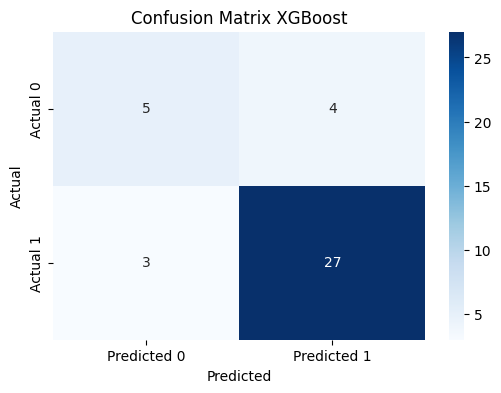

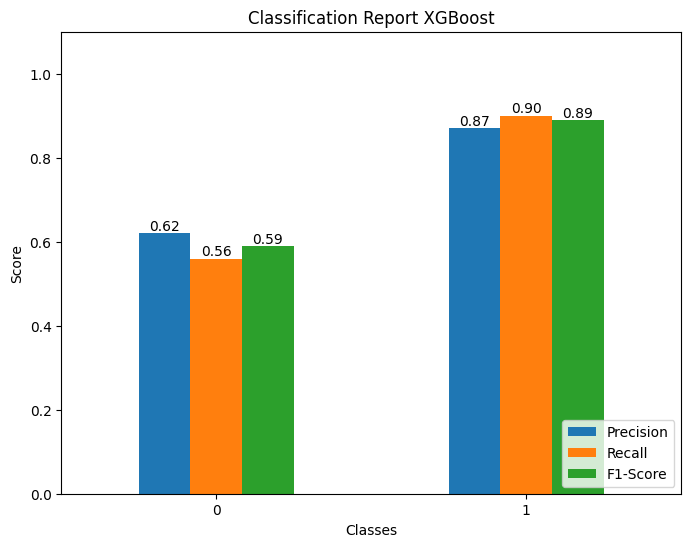

In [98]:
# Confusion matrix values
conf_matrix = np.array([[5, 4],
                        [3, 27]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report data
report_data = {
    'Class': ['0', '1'],
    'Precision': [0.62, 0.87],
    'Recall': [0.56, 0.90],
    'F1-Score': [0.59, 0.89]
}

# Convert to DataFrame
report_df = pd.DataFrame(report_data)

# Plot the bar chart
report_df.set_index('Class').plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report XGBoost')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# Annotate bars with values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

plt.show()

In [99]:
#KNN implementation, training and fitting the data 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)



KNeighborsClassifier()

In [100]:
y_pred = knn.predict(X_test_scale)


In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.74%
Confusion Matrix:
[[ 6  3]
 [ 1 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.91      0.97      0.94        30

    accuracy                           0.90        39
   macro avg       0.88      0.82      0.84        39
weighted avg       0.89      0.90      0.89        39



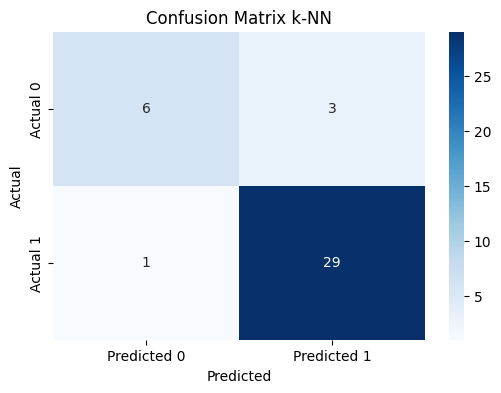

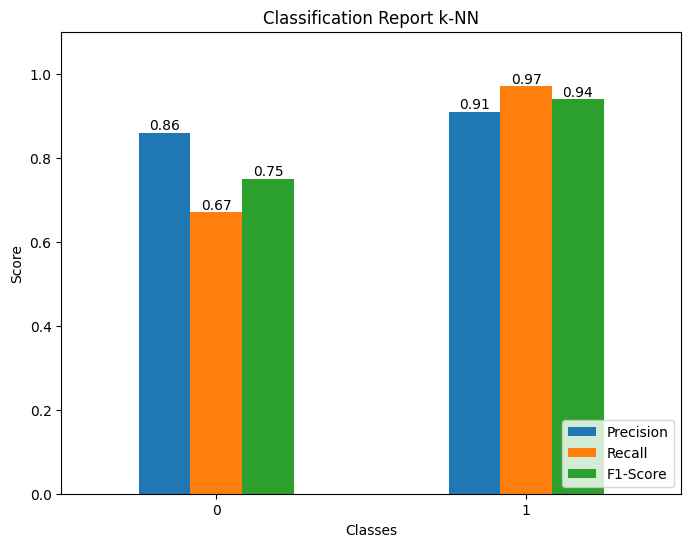

In [102]:
# Confusion matrix values
conf_matrix = np.array([[6, 3],
                        [1, 29]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix k-NN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report data
report_data = {
    'Class': ['0', '1'],
    'Precision': [0.86, 0.91],
    'Recall': [0.67, 0.97],
    'F1-Score': [0.75, 0.94]
}

# Convert to DataFrame
report_df = pd.DataFrame(report_data)

# Plot the bar chart
report_df.set_index('Class').plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report k-NN')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# Annotate bars with values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

plt.show()

In [103]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scale, y_train)

LogisticRegression()

In [104]:
y_pred = log_reg.predict(X_test_scale)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 82.05%
Confusion Matrix:
[[ 7  2]
 [ 5 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.93      0.83      0.88        30

    accuracy                           0.82        39
   macro avg       0.75      0.81      0.77        39
weighted avg       0.85      0.82      0.83        39



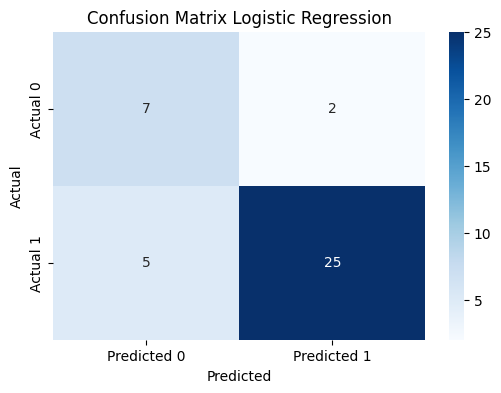

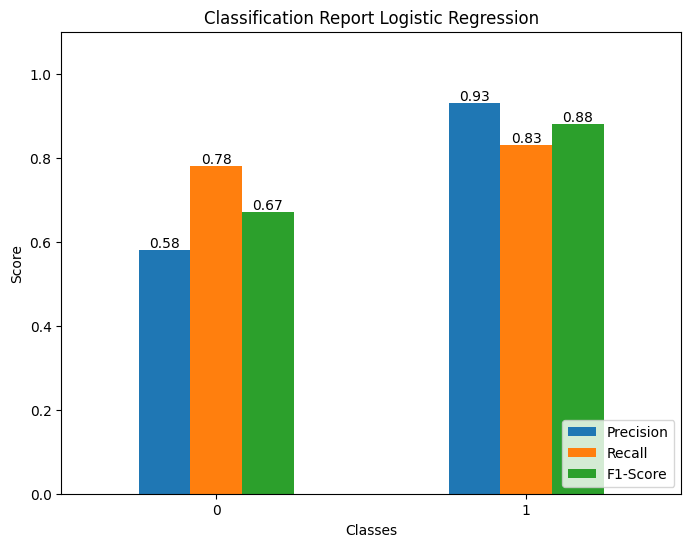

In [105]:
# Confusion matrix values
conf_matrix = np.array([[7, 2],
                        [5, 25]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report data
report_data = {
    'Class': ['0', '1'],
    'Precision': [0.58, 0.93],
    'Recall': [0.78, 0.83],
    'F1-Score': [0.67, 0.88]
}

# Convert to DataFrame
report_df = pd.DataFrame(report_data)

# Plot the bar chart
report_df.set_index('Class').plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report Logistic Regression')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# Annotate bars with values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

plt.show()

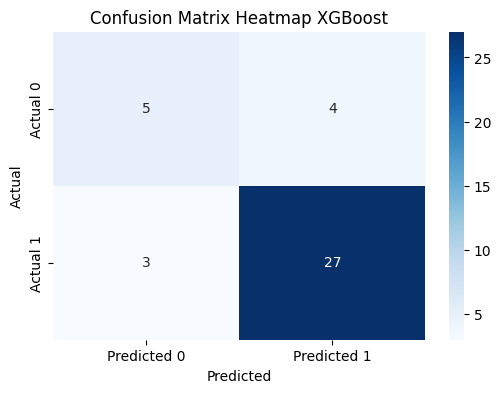

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion matrix values
conf_matrix = np.array([[5, 4],
                        [3, 27]])

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


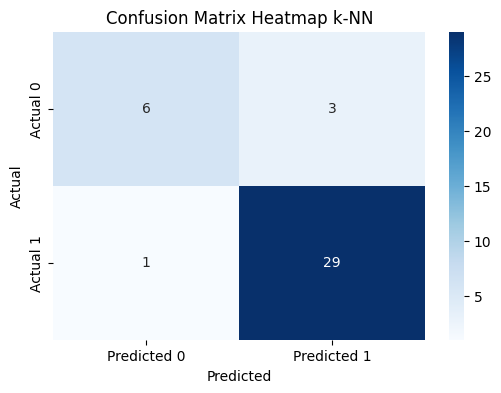

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion matrix values
conf_matrix = np.array([[6, 3],
                        [1, 29]])

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap k-NN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
